In [3]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Verifica la ruta y el delimitador del archivo CSV
df = pd.read_csv('Alquileres.csv', engine='python', delimiter=";")
df = df.replace(',', '.', regex=True)
df['realSum'] = df['realSum'].astype(float)
df['dayPrice'] = df['dayPrice'].astype(float)
df['dayPriceByPerson'] = df['dayPriceByPerson'].astype(float)
df['dist'] = df['dist'].astype(float)
df['metro_dist']= df['metro_dist'].astype(float)
df['attr_index_norm']= df['attr_index_norm'].astype(float)
df['person_capacity']= df['person_capacity'].astype(int)

# Realiza las operaciones que necesites con el DataFrame
df.head(15)

,ID,realSum,dayPrice,dayPriceByPerson,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,0,194.033698,388.067396,48.508425,Private room,False,True,2,False,1,...,5.022964,2.539380,78.69037927,4.166708,98.25389587,6.846472824,4.90569,52.41772,Amsterdam,True
1,1,344.245776,1376.983104,86.061444,Private room,False,True,4,False,0,...,0.488389,0.239404,631.1763783,33.421209,837.2807567,58.34292774,4.90005,52.37432,Amsterdam,True
2,2,264.101422,528.202845,66.025356,Private room,False,True,2,False,0,...,5.748312,3.651621,75.27587691,3.985908,95.38695493,6.646700255,4.97512,52.36103,Amsterdam,True
3,3,433.529398,1734.117592,108.382350,Private room,False,True,4,False,0,...,0.384862,0.439876,493.2725344,26.119108,875.0330976,60.97356517,4.89417,52.37663,Amsterdam,True
4,4,485.552926,971.105851,121.388231,Private room,False,True,2,True,0,...,0.544738,0.318693,552.8303244,29.272733,815.30574,56.81167696,4.90051,52.37508,Amsterdam,True
5,5,552.808567,1658.425703,138.202142,Private room,False,True,3,False,0,...,2.131420,1.904668,174.7889568,9.255191,225.2016624,15.69237584,4.87699,52.38966,Amsterdam,True
6,6,215.124317,430.248635,53.781079,Private room,False,True,2,False,0,...,1.881092,0.729747,200.1676516,10.599010,242.7655237,16.91625096,4.9157,52.38296,Amsterdam,True
7,7,2771.307384,11085.229540,692.826846,Entire home/apt,False,False,4,True,0,...,1.686807,1.458404,208.8081086,11.056528,272.3138229,18.97521897,4.88467,52.38749,Amsterdam,True
8,8,1001.804420,4007.217680,250.451105,Entire home/apt,False,False,4,False,0,...,3.719141,1.196112,106.2264562,5.624761,133.8762019,9.328686362,4.86459,52.40175,Amsterdam,True
9,9,276.521454,553.042908,69.130363,Private room,False,True,2,False,1,...,3.142361,0.924404,206.2528615,10.921226,238.2912578,16.60447768,4.876,52.347,Amsterdam,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   dayPrice                    51707 non-null  float64
 3   dayPriceByPerson            51707 non-null  float64
 4   room_type                   51707 non-null  object 
 5   room_shared                 51707 non-null  bool   
 6   room_private                51707 non-null  bool   
 7   person_capacity             51707 non-null  int64  
 8   host_is_superhost           51707 non-null  bool   
 9   multi                       51707 non-null  int64  
 10  biz                         51707 non-null  int64  
 11  cleanliness_rating          51707 non-null  int64  
 12  guest_satisfaction_overall  51707 non-null  int64  
 13  bedrooms                    517

In [4]:
df.describe()

,ID,realSum,dayPrice,dayPriceByPerson,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000
mean,1620.502388,279.879591,971.364197,69.969898,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,13.423792
std,1217.380366,327.948386,1410.207733,81.987097,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,9.807985
min,0.000000,34.779339,69.558678,8.694835,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,0.926301
25%,646.000000,148.752174,360.779887,37.188043,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,6.380926
50%,1334.000000,211.343089,601.143018,52.835772,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,11.468305
75%,2382.000000,319.694286,1087.601992,79.923572,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,17.415082
max,5378.000000,18545.450280,77623.650600,4636.362570,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,100.000000


Utilizamos SeaBorn para analizar cantidades de cada tipo de habitacion y cantidad de superhost en el dataset

In [6]:
df.groupby(['room_type']).size()

room_type
Entire home/apt    32648
Private room       18693
Shared room          366
dtype: int64

In [7]:
df.groupby(['host_is_superhost']).size()

host_is_superhost
False    38475
True     13232
dtype: int64

Observamos la proporcion de cada tipo de habitacion y dentro de cada una la cantidad de superhost

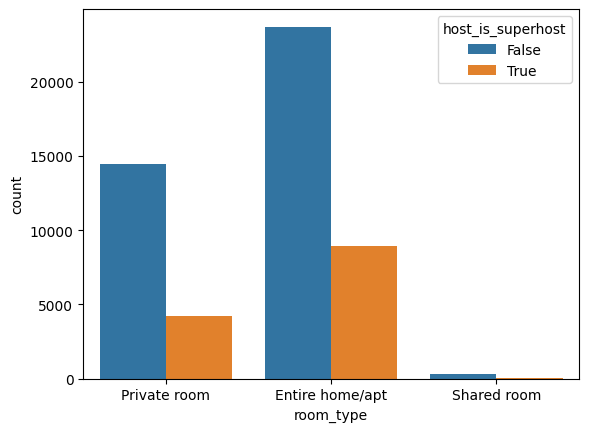

In [8]:
#sns.set(style='darkgrid')
sns.countplot(x='room_type',data=df,hue='host_is_superhost')
plt.show()

Analizamos la distribucion de los precios por persona

<Figure size 1000x1000 with 0 Axes>

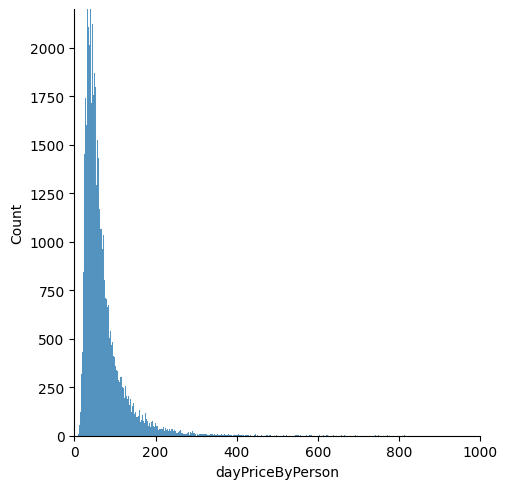

In [9]:
fig = plt.figure(figsize=(10,10))
sns.displot(df['dayPriceByPerson'])
plt.xlim(left=0, right=1000)  # Establecer los límites del eje x
plt.ylim(bottom=0, top=2200)  # Establecer los límites del eje y
plt.show()

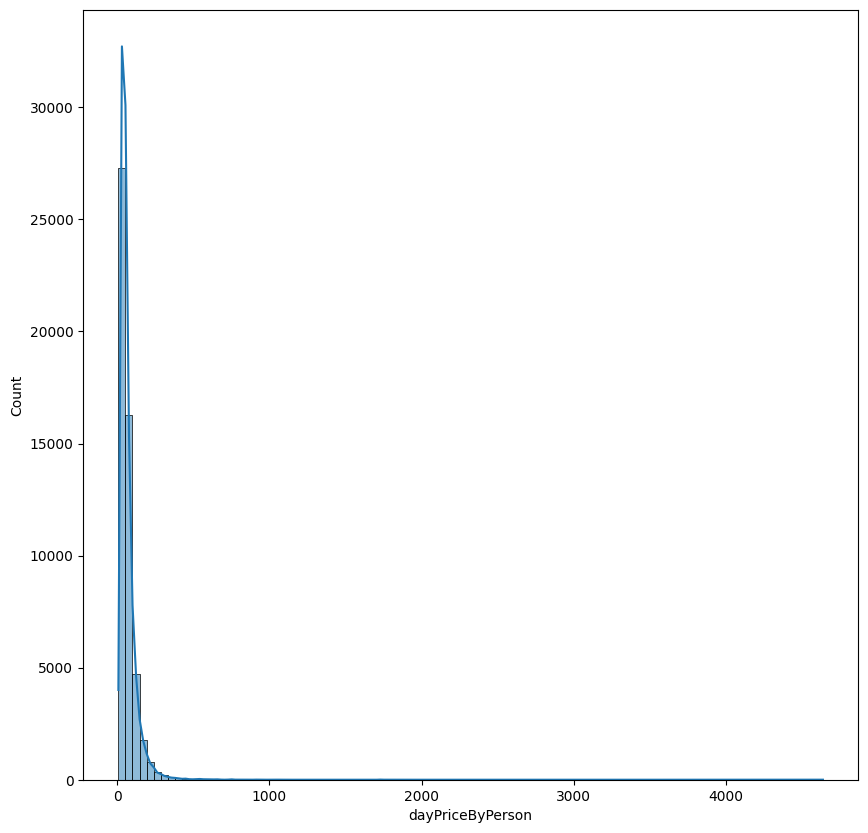

In [10]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df['dayPriceByPerson'], bins=100, kde=True)
plt.show()

Analizando el promedio de precios por dia por persona en cada ciudad

Text(0.5, 1.0, 'Promedio de Precios por Ciudad')

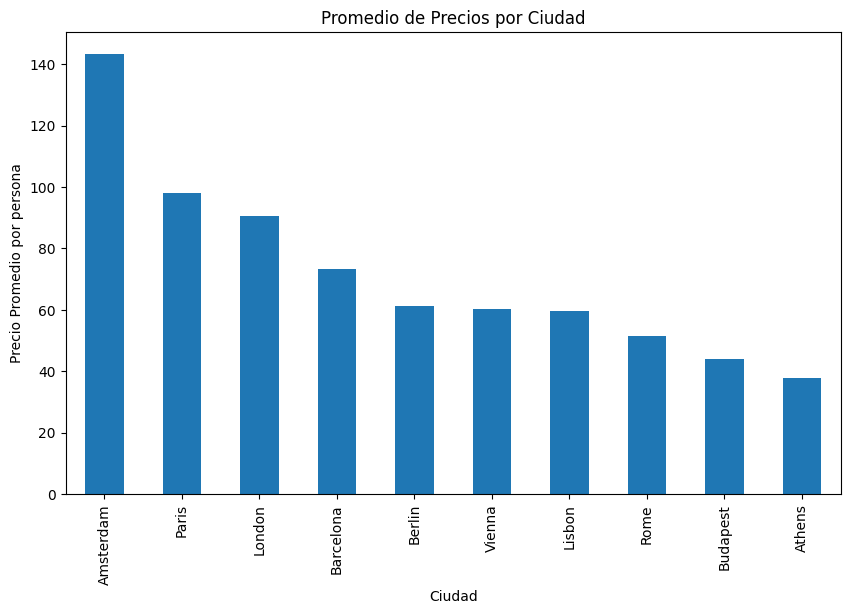

In [10]:
# Calcular el promedio de precios por ciudad
promedios = df.groupby('city')['dayPriceByPerson'].mean().sort_values(ascending=False)

# Crear el gráfico de barras con los promedios de precios
fig, ax = plt.subplots(figsize=(10, 6))
promedios.plot(kind='bar', ax=ax)

# Personalizar el gráfico
ax.set_xlabel('Ciudad')
ax.set_ylabel('Precio Promedio por persona')
ax.set_title('Promedio de Precios por Ciudad')

Analizando la relacion entre las variables de limpieza y valoracion final

Text(0.1, 0.9, 'Coef. Corr.: 0.71')

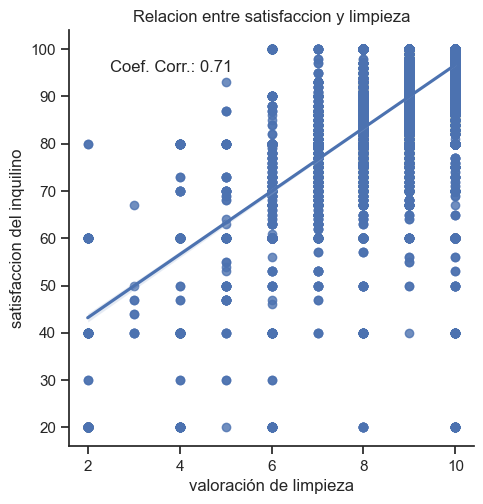

In [11]:
sns.set_theme(style='ticks')
sns.lmplot(
    data = df, x = 'cleanliness_rating', y='guest_satisfaction_overall'
)

coef_corr = df['cleanliness_rating'].corr(df['guest_satisfaction_overall'])

plt.xlabel('valoración de limpieza')
plt.ylabel('satisfaccion del inquilino')
plt.title('Relacion entre satisfaccion y limpieza')

plt.annotate(f'Coef. Corr.: {coef_corr:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

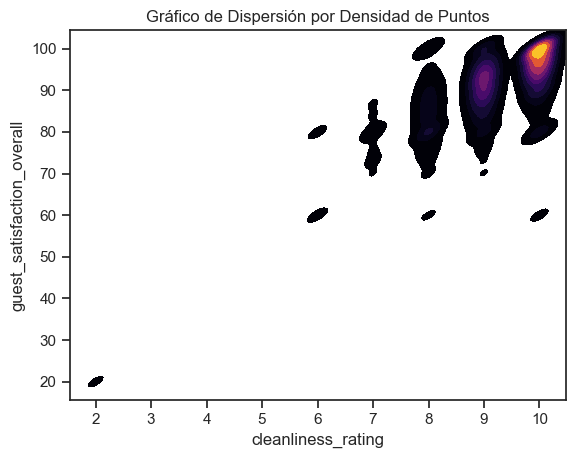

In [13]:
sns.kdeplot(x=df['cleanliness_rating'], y=df['guest_satisfaction_overall'], cmap='inferno', fill=True)

# Personalizar el gráfico
plt.xlabel('cleanliness_rating')
plt.ylabel('guest_satisfaction_overall')
plt.title('Gráfico de Dispersión por Densidad de Puntos')

plt.show()

## Modelo de Predicción
### Dividisión de variable a predecir del resto del dataset

In [16]:
columnas_numericas = df.select_dtypes(include=[float, int]).columns
# Crea el nuevo dataframe con las columnas numéricas
X = df[columnas_numericas].copy()
print(X.columns)

y = df.iloc[:, 2].values #columna dayPrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['ID', 'realSum', 'dayPrice', 'dayPriceByPerson', 'person_capacity',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'attr_index_norm'],
      dtype='object')


In [17]:
X

,ID,realSum,dayPrice,dayPriceByPerson,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm
0,0,194.033698,388.067396,48.508425,2,1,0,10,93,1,5.022964,2.539380,4.166708
1,1,344.245776,1376.983104,86.061444,4,0,0,8,85,1,0.488389,0.239404,33.421209
2,2,264.101422,528.202845,66.025356,2,0,1,9,87,1,5.748312,3.651621,3.985908
3,3,433.529398,1734.117592,108.382350,4,0,1,9,90,2,0.384862,0.439876,26.119108
4,4,485.552926,971.105851,121.388231,2,0,0,10,98,1,0.544738,0.318693,29.272733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,4295.631442,178.984643,6,0,1,10,100,3,0.530181,0.135447,15.712158
51703,1795,304.793960,609.587920,76.198490,2,0,0,8,86,1,0.810205,0.100839,14.678608
51704,1796,637.168969,1274.337938,159.292242,2,0,0,10,93,1,0.994051,0.202539,12.107921
51705,1797,301.054157,602.108314,75.263539,2,0,0,10,87,1,3.044100,0.287435,7.822803


In [18]:
y

array([ 388.0673962, 1376.983104 ,  528.2028448, ..., 1274.337938 ,
        602.108314 ,  532.9219548])

###  Entrenamiento del modelo de Regresión Lineal con el dataset de Training

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicción de los resultados del dataset de Test

In [21]:
y_pred = regressor.predict(X_test)
y_pred

""" Recorrer todas las columnas numéricas para probar la regresión lineal """
# for var in columnas_numericas:
#     x = X_train[[var]]
#     print(x)
#     print(y_train)
#     plt.scatter(x, y_train, color = 'red')
#     plt.plot(x, regressor.predict(x), color = 'blue')
#     plt.title('Salary vs Experience (Training set)')
#     plt.xlabel('Years of Experience')
#     plt.ylabel('Salary')
#     plt.show()

' Recorrer todas las columnas numéricas para probar la regresión lineal '

## Modelo de Predicción 2

In [22]:
# de km a cuadras:
from_km_to_blocks = 0.1
df["dist_en_cuadras"] = df["dist"] / from_km_to_blocks
df

,ID,realSum,dayPrice,dayPriceByPerson,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday,dist_en_cuadras
0,0,194.033698,388.067396,48.508425,Private room,False,True,2,False,1,...,2.539380,78.69037927,4.166708,98.25389587,6.846472824,4.90569,52.41772,Amsterdam,True,50.229638
1,1,344.245776,1376.983104,86.061444,Private room,False,True,4,False,0,...,0.239404,631.1763783,33.421209,837.2807567,58.34292774,4.90005,52.37432,Amsterdam,True,4.883893
2,2,264.101422,528.202845,66.025356,Private room,False,True,2,False,0,...,3.651621,75.27587691,3.985908,95.38695493,6.646700255,4.97512,52.36103,Amsterdam,True,57.483119
3,3,433.529398,1734.117592,108.382350,Private room,False,True,4,False,0,...,0.439876,493.2725344,26.119108,875.0330976,60.97356517,4.89417,52.37663,Amsterdam,True,3.848620
4,4,485.552926,971.105851,121.388231,Private room,False,True,2,True,0,...,0.318693,552.8303244,29.272733,815.30574,56.81167696,4.90051,52.37508,Amsterdam,True,5.447382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,4295.631442,178.984643,Entire home/apt,False,False,6,False,0,...,0.135447,219.4024782,15.712158,438.7568743,10.60458437,16.3794,48.21136,Vienna,False,5.301808
51703,1795,304.793960,609.587920,76.198490,Entire home/apt,False,False,2,False,0,...,0.100839,204.9701212,14.678608,342.1828131,8.27042657,16.3807,48.20296,Vienna,False,8.102052
51704,1796,637.168969,1274.337938,159.292242,Entire home/apt,False,False,2,False,0,...,0.202539,169.0734018,12.107921,282.2964245,6.822995662,16.38568,48.2046,Vienna,False,9.940513
51705,1797,301.054157,602.108314,75.263539,Private room,False,True,2,False,0,...,0.287435,109.2365739,7.822803,158.5633983,3.83241616,16.341,48.192,Vienna,False,30.440997


In [23]:
X_row = df.iloc[:, -1].values
X = X_row.reshape(-1,1)
X

array([[50.22963798],
       [ 4.88389289],
       [57.48311915],
       ...,
       [ 9.94051332],
       [30.4409973 ],
       [12.63931726]])

In [25]:
y = df.iloc[:, 2].values #columna dayPrice
y

array([ 388.0673962, 1376.983104 ,  528.2028448, ..., 1274.337938 ,
        602.108314 ,  532.9219548])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_train

array([[43.16048955],
       [35.02750743],
       [10.78494148],
       ...,
       [34.82529544],
       [24.16837991],
       [21.3938255 ]])

In [28]:
y_train

array([ 853.735977 ,  553.6202744,  972.9805732, ..., 1529.499487 ,
        548.3561034,  576.209052 ])

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test)
y_pred

array([ 893.69388752,  850.52924019, 1030.18292775, ...,  969.43044486,
       1012.7518235 ,  881.63793937])

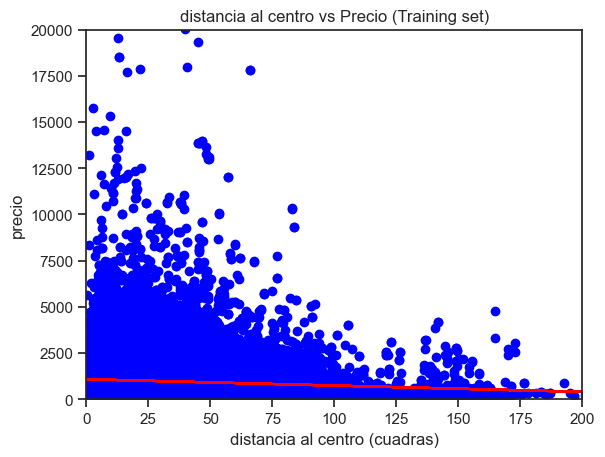

In [33]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('distancia al centro vs Precio (Training set)')
plt.xlabel('distancia al centro (cuadras)')
plt.ylabel('precio')

y_limit = 20000
x_limit = 200
plt.ylim(0, y_limit)
plt.xlim(0,x_limit)

plt.show()

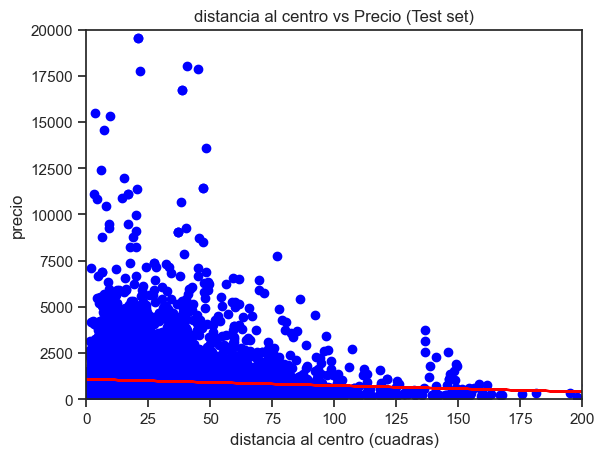

In [34]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('distancia al centro vs Precio (Test set)')
plt.xlabel('distancia al centro (cuadras)')
plt.ylabel('precio')

y_limit = 20000
x_limit = 200
plt.ylim(0, y_limit)
plt.xlim(0,x_limit)

plt.show()

In [35]:
r2 = r2_score(y_test, y_pred)
r2
# pesimo coeficiente

0.003457121198255586

## Prediccion 3
#### Predecir precio por dia (dayPrice) a traves de la capacidad del lugar

In [30]:
dataset = df

X = dataset.iloc[:, 7].values #Seleccionar variables person_capacity y distancia al centro
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 3].values #Seleccionar la variable independiente --> dayPrice

In [31]:
dataset

,ID,realSum,dayPrice,dayPriceByPerson,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,0,194.033698,388.067396,48.508425,Private room,False,True,2,False,1,...,5.022964,2.539380,78.69037927,4.166708,98.25389587,6.846472824,4.90569,52.41772,Amsterdam,True
1,1,344.245776,1376.983104,86.061444,Private room,False,True,4,False,0,...,0.488389,0.239404,631.1763783,33.421209,837.2807567,58.34292774,4.90005,52.37432,Amsterdam,True
2,2,264.101422,528.202845,66.025356,Private room,False,True,2,False,0,...,5.748312,3.651621,75.27587691,3.985908,95.38695493,6.646700255,4.97512,52.36103,Amsterdam,True
3,3,433.529398,1734.117592,108.382350,Private room,False,True,4,False,0,...,0.384862,0.439876,493.2725344,26.119108,875.0330976,60.97356517,4.89417,52.37663,Amsterdam,True
4,4,485.552926,971.105851,121.388231,Private room,False,True,2,True,0,...,0.544738,0.318693,552.8303244,29.272733,815.30574,56.81167696,4.90051,52.37508,Amsterdam,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,4295.631442,178.984643,Entire home/apt,False,False,6,False,0,...,0.530181,0.135447,219.4024782,15.712158,438.7568743,10.60458437,16.3794,48.21136,Vienna,False
51703,1795,304.793960,609.587920,76.198490,Entire home/apt,False,False,2,False,0,...,0.810205,0.100839,204.9701212,14.678608,342.1828131,8.27042657,16.3807,48.20296,Vienna,False
51704,1796,637.168969,1274.337938,159.292242,Entire home/apt,False,False,2,False,0,...,0.994051,0.202539,169.0734018,12.107921,282.2964245,6.822995662,16.38568,48.2046,Vienna,False
51705,1797,301.054157,602.108314,75.263539,Private room,False,True,2,False,0,...,3.044100,0.287435,109.2365739,7.822803,158.5633983,3.83241616,16.341,48.192,Vienna,False


In [32]:
X

array([[10],
       [ 8],
       [ 9],
       ...,
       [10],
       [10],
       [10]], dtype=int64)

In [33]:
y

array([ 48.50842453,  86.061444  ,  66.0253556 , ..., 159.2922423 ,
        75.26353925,  33.30762218])

### 2) Dividir el dataset en Training y Test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 78)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
print('coeficiente = ' + str(regressor.coef_) + ', intercepto = ' + str(regressor.intercept_))

coeficiente = [5.06904349e+02 4.54841652e-01], intercepto = -635.4543402154143


#### Predecir los resultados del dataset de Test

In [35]:
y_pred = regressor.predict(X_test)
y_pred

array([96.73017215, 96.73017215, 89.98867207, ..., 83.247172  ,
       96.73017215, 96.73017215])

#### Predecir 1 valor puntual

In [48]:
valor_capacidad = 4
valor_distancia = 1.26
valor_x_array = np.array([valor_capacidad, valor_distancia])
pred_valor_x = regressor.predict(valor_x_array.reshape(-2,2))
pred_valor_x

array([1392.73615491])

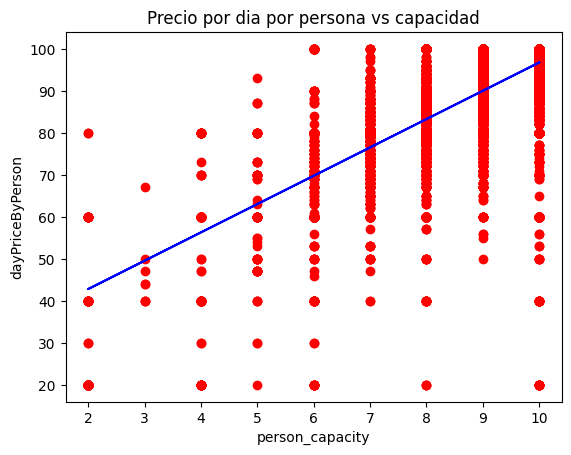

In [41]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Precio por dia por persona vs capacidad')
plt.xlabel('person_capacity')
plt.ylabel('dayPriceByPerson')
plt.show()

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [42]:
r2 = r2_score(y_test, y_pred)
r2

0.45661094020781845

#### MSE Mean Square Error - Error cuadratico medio
Compara los valores predichos por el modelo con los valores reales al cuadrado.

In [39]:
mse = mean_squared_error(y_test, y_pred)
mse

41.5500311379295

## Prediccion 4
#### Predecir precio por dia (dayPrice), teniendo en cuenta el indice de atraccion del lugar

In [96]:
dataset = df

X_row = dataset.iloc[:, 17].values # Seleccionar variable attr_indice_normalizado
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 2].values # Seleccionar la variable independiente --> dayPrice

In [97]:
X

array([[ 4.16670787],
       [33.42120862],
       [ 3.9859077 ],
       ...,
       [12.10792146],
       [ 7.82280266],
       [10.77426362]])

In [98]:
y

array([ 388.0673962, 1376.983104 ,  528.2028448, ..., 1274.337938 ,
        602.108314 ,  532.9219548])

### 2) Dividir el dataset en Training y Test

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 60)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [100]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [101]:
print('coeficiente = ' + str(regressor.coef_) + ', intercepto = ' + str(regressor.intercept_))

coeficiente = [35.64356594], intercepto = 491.4268601174797


### 4) Predecir los resultados del dataset de Test

In [102]:
y_pred = regressor.predict(X_test)
y_pred

array([1058.04125621, 1353.32468636,  647.02733696, ..., 1358.51174053,
       1110.48344873,  671.60695829])

#### Predecir 1 valor puntual

In [103]:
valor_attr = 4.16
valor_x_array = np.array([valor_attr])
pred_valor_x = regressor.predict(valor_x_array.reshape(-1,1))
pred_valor_x

array([639.70409445])

### Visualizar los resultados con el dataset de Training

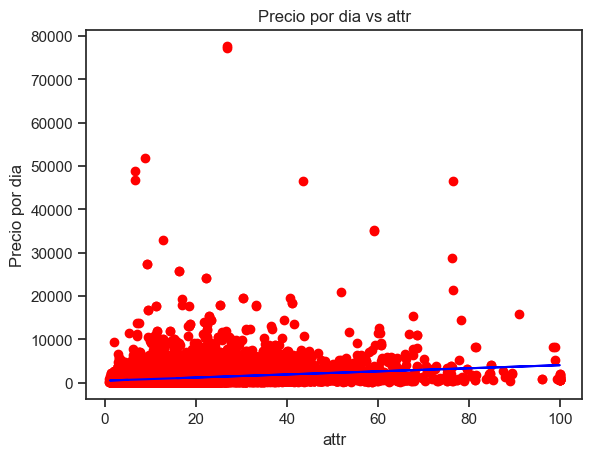

In [104]:
plt.scatter(X_train.tolist(), y_train.tolist(), color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Precio por dia vs attr')
plt.xlabel('attr')
plt.ylabel('Precio por dia')
plt.show()

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [105]:
r2 = r2_score(y_test, y_pred)
r2

0.062409178683917044

#### MSE Mean Square Error - Error cuadratico medio
Compara los valores predichos por el modelo con los valores reales al cuadrado.

In [106]:
mse = mean_squared_error(y_test, y_pred)
mse

1717202.4040502375

## Prediccion 5
### Predecir precio por dia (dayPrice), teniendo en cuenta la distancia al metro y al centro

In [107]:
dataset = df

X = dataset.iloc[:, [14, 15]].values #Seleccionar variables metro_dist y dist
y = dataset.iloc[:, 2].values #Seleccionar la variable independiente --> dayPrice

In [108]:
X

array([[5.0229638 , 2.53938   ],
       [0.48838929, 0.23940392],
       [5.74831192, 3.65162129],
       ...,
       [0.99405133, 0.20253882],
       [3.04409973, 0.28743469],
       [1.26393173, 0.48090251]])

In [109]:
y

array([ 388.0673962, 1376.983104 ,  528.2028448, ..., 1274.337938 ,
        602.108314 ,  532.9219548])

### 2) Dividir el datase en Training y Test

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [111]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 4) Predecir los resultados del dataset de Test

In [112]:
y_pred = regressor.predict(X_test)
y_pred

array([ 975.33005747, 1025.97454687,  980.71525741, ..., 1002.19945463,
       1021.26149368, 1028.60543315])

#### Predecir 1 valor puntual

In [113]:
valor_dist = 5.022
valor_metro_dist = 2.539
valor_x_array = np.array([valor_dist, valor_metro_dist])
pred_valor_x = regressor.predict(valor_x_array.reshape(-2,2))
pred_valor_x

array([832.96448734])

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [114]:
r2 = r2_score(y_test, y_pred)
r2

0.004169984788575665

## Prediccion 6
### Predecir indice de atracción (attr_index_norm), teniendo en cuenta la distancia al centro (dist)

In [73]:
dataset = df

X_row = dataset.iloc[:, 14].values # Seleccionar variable dist
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 17].values # Seleccionar la variable independiente --> attr_indice_normalizado

In [116]:
X

array([[5.0229638 , 2.53938   ],
       [0.48838929, 0.23940392],
       [5.74831192, 3.65162129],
       ...,
       [0.99405133, 0.20253882],
       [3.04409973, 0.28743469],
       [1.26393173, 0.48090251]])

In [115]:
y

array([ 388.0673962, 1376.983104 ,  528.2028448, ..., 1274.337938 ,
        602.108314 ,  532.9219548])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [90]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = regressor.predict(X_test)
y_pred

array([11.22535898,  9.97003098, 15.19477666, ..., 13.42795363,
       14.68783974, 10.87474406])

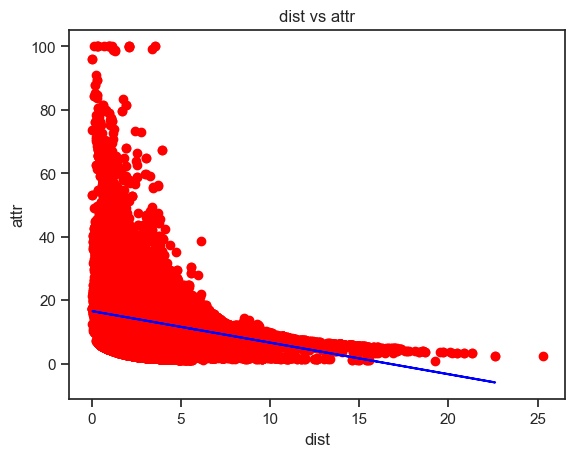

In [94]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('dist vs attr')
plt.xlabel('dist')
plt.ylabel('attr')
plt.show()

In [117]:
r2 = r2_score(y_test, y_pred)
r2

0.004169984788575665

## Prediccion 7
### Predecir guest_satisfaction_overall a traves del cleanliness_rating	

In [5]:
dataset = df

X_row = dataset.iloc[:, 11].values # Seleccionar variable cleanlinness_reating
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 12].values # Seleccionar la variable independiente --> guest_satisfaction_overall

In [6]:
X

array([[10],
       [ 8],
       [ 9],
       ...,
       [10],
       [10],
       [10]], dtype=int64)

In [7]:
y

array([93, 85, 87, ..., 93, 87, 93], dtype=int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([96.73017215, 96.73017215, 89.98867207, ..., 83.247172  ,
       96.73017215, 96.73017215])

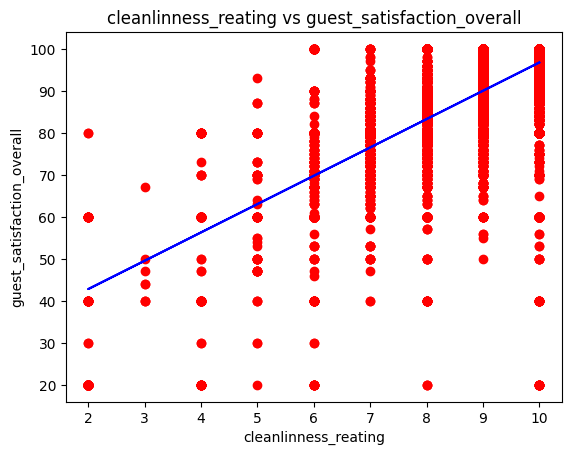

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('cleanlinness_reating vs guest_satisfaction_overall')
plt.xlabel('cleanlinness_reating')
plt.ylabel('guest_satisfaction_overall')

plt.show()

In [17]:
r2 = r2_score(y_test, y_pred)
r2

0.45661094020781845